# Attention Demonstration

In [2]:
import numpy as np
import math


def load_glove_embeddings(path):
    print("Loading GloVe embeddings from:", path)
    embeddings = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=np.float32)
            embeddings[word] = vector
    print(f"Loaded embeddings, for {len(embeddings)} words.")
    return embeddings

glove_path = "/Users/shivam13juna/Documents/scaler/iitr_classes/jan_2026/language_model_api_v2/glove.6B.100d.txt"  # Download from GloVe site if needed
glove = load_glove_embeddings(glove_path)

Loading GloVe embeddings from: /Users/shivam13juna/Documents/scaler/iitr_classes/jan_2026/language_model_api_v2/glove.6B.100d.txt
Loaded embeddings, for 400000 words.


In [3]:
glove['pig']

array([ 3.9896e-01,  9.8205e-01,  5.8802e-02, -9.8601e-01, -1.8525e-01,
        4.4438e-02, -1.4084e-01, -8.7583e-02, -8.9056e-04, -8.0119e-02,
       -1.2255e+00,  1.8646e-01,  9.0865e-01,  2.7763e-01,  1.8609e-01,
        9.0665e-01,  1.7967e-01, -1.8444e-01,  7.9665e-01, -3.9301e-02,
        5.7227e-01,  5.2010e-01,  2.0734e-01, -9.2980e-01,  4.8561e-01,
        1.1551e+00, -4.1516e-01,  3.9457e-01,  5.9278e-02,  8.0333e-01,
        6.6786e-02,  2.7474e-01,  1.1565e+00,  6.2879e-02,  6.5594e-02,
        2.9555e-01, -3.1581e-01, -1.5748e-01, -1.9995e-01, -3.4515e-01,
       -3.5384e-02, -2.9105e-02, -4.5018e-01, -4.7077e-01,  6.2343e-02,
        2.8021e-01, -6.6225e-01, -6.8586e-01, -5.2311e-01, -4.3585e-01,
       -7.4814e-01, -3.9187e-02,  3.0498e-01,  8.4939e-01, -1.2977e+00,
       -2.4158e-01, -8.2117e-01,  1.1651e-01,  1.4323e-01, -2.6843e-01,
        7.2490e-01,  7.2850e-01,  3.5151e-01,  2.7656e-01,  9.6263e-01,
        4.6371e-01, -2.7808e-01, -1.6660e-01, -1.1087e-01, -1.47

In [4]:
query_word = "king"
key_words = ["man", "queen", "apple", "banana"]
value_words = key_words  # same as keys for demo

In [6]:
K = np.array([glove[w] for w in key_words])

V = K.copy()
K.shape


(4, 100)

In [7]:
Q = glove[query_word].reshape(1, -1)


d_k = Q.shape[-1]
scores = np.dot(Q, K.T) / math.sqrt(d_k)


def softmax(x):
    e_x = np.exp(x - np.max(x)) # [1, 2, 3, 4] -> [-3, -2, -1, 0]
    return e_x / e_x.sum(axis=-1, keepdims=True)

attention_weights = softmax(scores)

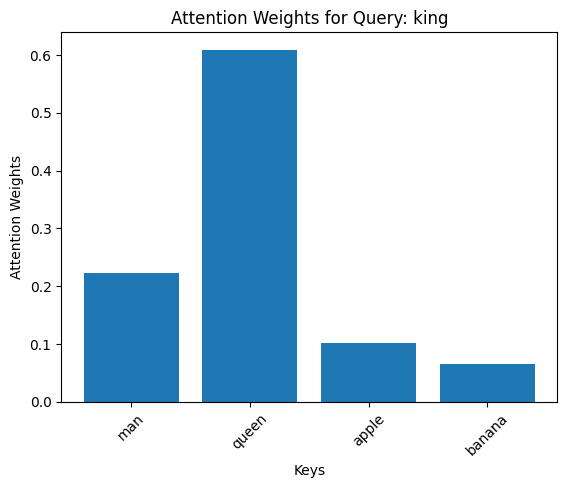

In [8]:
# plot bar chart of attention weights
import matplotlib.pyplot as plt

plt.bar(key_words, attention_weights.ravel())
plt.xlabel('Keys')
plt.ylabel('Attention Weights')
plt.title('Attention Weights for Query: ' + query_word)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# computing context vector
context_vector = np.dot(attention_weights, V)  # shape (1, d)

print(f"Context vector shape: {context_vector.shape}, for query '{query_word}': {context_vector.flatten()[:5]}...")  # show first 5 elements

In [ ]:
# Run once to install required packages
#!pip install openai python-dotenv tiktoken -q